<a href="https://colab.research.google.com/github/Nithin10u/Fake_Review_Project/blob/main/Fake_Review_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text-Preprocessing

importing libraries

In [4]:
import pandas as pd
import string, nltk
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Loading the dataset

In [6]:
file_path = r"/content/fake_reviews_dataset.csv"
df = pd.read_csv(file_path)


In [8]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


data preprocessing

check for null values

In [9]:
df.isnull().sum()

,0
category,0
rating,0
label,0
text_,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


EDA

summary statistics of a DataFrame

In [11]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [12]:
df['rating'].value_counts()

,count
rating,
5.0,24559
4.0,7965
3.0,3786
1.0,2155
2.0,1967


visualizing the propotions of ratings

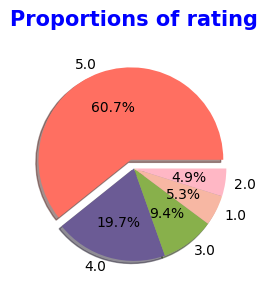

In [13]:
plt.figure(figsize=(5,3))

labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1, 0, 0, 0, 0)
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#f7b7a3', '#ffb7c5']
plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', colors=colors)
plt.title('Proportions of rating', fontweight='bold', fontsize=15, pad=20, color='Blue')

plt.show()

Datatype convertion

In [14]:
# object to string conversion
df['text_'] = df['text_'].astype(str)

clean and standardize text data

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

removing stopwords, punctuation, and digits, while lowering the text case

In [16]:
# function to preprocess the text data
# Load stopwords and punctuation once
stop_words = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)

def preprocess(text):
    return ' '.join(
        word for word in word_tokenize(text.lower())  # Convert text to lowercase to standardize
        if word not in stop_words and not word.isdigit() and word not in punctuation_set
    )

In [17]:
preprocess(df['text_'][4])

'nice set good quality set two months'

In [18]:
from tqdm import tqdm

# Apply the function with a progress bar
tqdm.pandas()
df['text_'] = df['text_'].progress_apply(preprocess)

100%|██████████| 40432/40432 [00:21<00:00, 1901.13it/s]


Applying PorterStemmer to reduce words to their root form

In [19]:
# Stemmer
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

reducing words to their base or dictionary form using WordNetLemmatizer

In [20]:
#lemmetizer
lemmatizer = WordNetLemmatizer()
def lemm_words(text):
    return [lemmatizer.lemmatize(word) for word in text.split()]
df['text_'] = df['text_'].apply(lambda text : lemm_words(text))

In [21]:
df['text_'].head()

,text_
0,"[love, well, made, sturdi, comfort, love, pretti]"
1,"[love, great, upgrad, origin, 've, mine, coupl..."
2,"[pillow, save, back, love, look, feel, pillow]"
3,"[miss, inform, use, great, product, price]"
4,"[nice, set, good, qualiti, set, two, month]"


In [22]:
# Join the list of words in each row to form a single sentence, the form that is typically required for training machine learning models.
df['cleaned_text'] = df['text_'].apply(lambda words: ' '.join(words))

In [23]:
#saving the csv file
df.to_csv(r"TP_DS.csv",index=False)

In [24]:
df.head()

,category,rating,label,text_,cleaned_text
0,Home_and_Kitchen_5,5.0,CG,"[love, well, made, sturdi, comfort, love, pretti]",love well made sturdi comfort love pretti
1,Home_and_Kitchen_5,5.0,CG,"[love, great, upgrad, origin, 've, mine, coupl...",love great upgrad origin 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,"[pillow, save, back, love, look, feel, pillow]",pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"[miss, inform, use, great, product, price]",miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,"[nice, set, good, qualiti, set, two, month]",nice set good qualiti set two month


In [25]:
# adds quotes around each string in the 'cleaned_text' column,to ensure that each entry in the column is treated as a single field
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: f'"{x}"')

In [26]:
# Save to CSV with quotes included
df.to_csv('output_with_quotes.csv', index=False)

Topic Modelling

In [27]:
#importing libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [28]:
#loading preprocessed data
data = pd.read_csv(r"TP_DS.csv")

In [29]:
#The reviews variable will contain only the non-null review text
# Sample DataFrame (adjust the 'cleaned_text' column as needed)
reviews = data['cleaned_text'].dropna()  # Assuming 'data' is the DataFrame with review text

Step 1: Text Vectorization with TF-IDF

In [30]:
#transforme your text data (reviews) into a numerical format (tfidf_matrix) suitable for further analysis or modeling.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

Step 2: LDA and NMF for Topic Modeling

In [31]:
#apply two different algorithms (LDA and NMF) to identify topics in your text data
n_topics = 100 # Number of topics

# LDA Model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)

# NMF Model
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

# Helper function to get top words per topic
def get_top_words(model, feature_names, n_top_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[f"Topic {topic_idx + 1}"] = top_words
    return topics

# Get top words for each topic
lda_top_words = get_top_words(lda_model, tfidf_vectorizer.get_feature_names_out())
nmf_top_words = get_top_words(nmf_model, tfidf_vectorizer.get_feature_names_out())

print("LDA Topics:\n", lda_top_words)
print("NMF Topics:\n", nmf_top_words)

LDA Topics:
 {'Topic 1': ['pillow', 'cheap', 'assembl', 'cook', 'accur', 'feel', 'look', 'easi', 'love', 'great'], 'Topic 2': ['dvd', 'origin', 'everyon', 'sometim', 'memori', 'compar', 'impress', 'dead', 'cours', 'movi'], 'Topic 3': ['reason', 'gave', 'star', 'ador', 'plastic', 'small', 'good', 'qualiti', 'comfort', 'materi'], 'Topic 4': ['link', 'class', 'hook', 'twist', 'predict', 'data', 'suspens', 'ref', 'norm', 'nbsp'], 'Topic 5': ['shirt', 'smell', 'pan', 'thank', 'tree', 'unless', 'great', 'use', 'love', 'like'], 'Topic 6': ['babi', 'broken', 'replac', 'bought', 'classic', 'die', 'love', 'natur', 'old', 'tv'], 'Topic 7': ['shoe', 'comfort', 'bulki', 'fit', 'toe', 'foot', 'heel', 'practic', 'look', 'love'], 'Topic 8': ['book', 'novel', 'read', 'reader', 'chain', 'histor', 'histori', 'stori', 'american', 'fiction'], 'Topic 9': ['light', 'bright', 'bathroom', 'great', 'use', 'quiet', 'color', 'work', 'fan', 'offic'], 'Topic 10': ['switch', 'trs', 'parti', 'tini', 'smart', 'lower',

Topic Modeling, Clustering (K-Means), and Visualization (PCA & t-SNE)

In [32]:
#performing topic modeling, followed by clustering (via K-Means) and visualizing the results using PCA and t-SNE.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [33]:
# Load Data
data = pd.read_csv(r"TP_DS.csv")
reviews = data['cleaned_text'].dropna()

Step 1: Text Vectorization with TF-IDF

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews)

Step 2: LDA and NMF for Topic Modeling

In [35]:
from sklearn.decomposition import LatentDirichletAllocation, NMF
n_topics = 100

In [36]:
# LDA Model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)

Step 3: Apply K-Means Clustering on Topic Model Features

In [37]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(lda_topics)  # Using LDA topic distribution for clustering

Step 4: Visualize Clusters using PCA or t-SNE

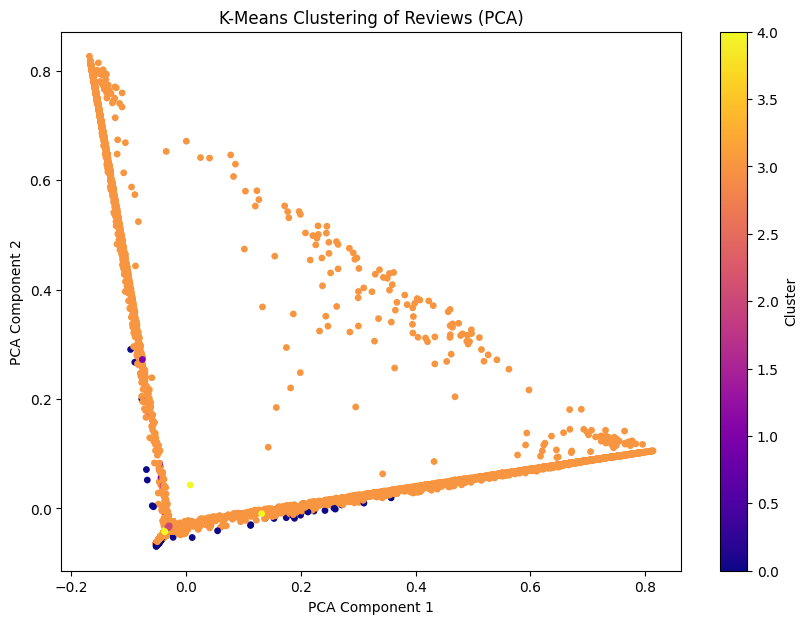

In [38]:
# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(lda_topics)

plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='plasma', s=15)
plt.title("K-Means Clustering of Reviews (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

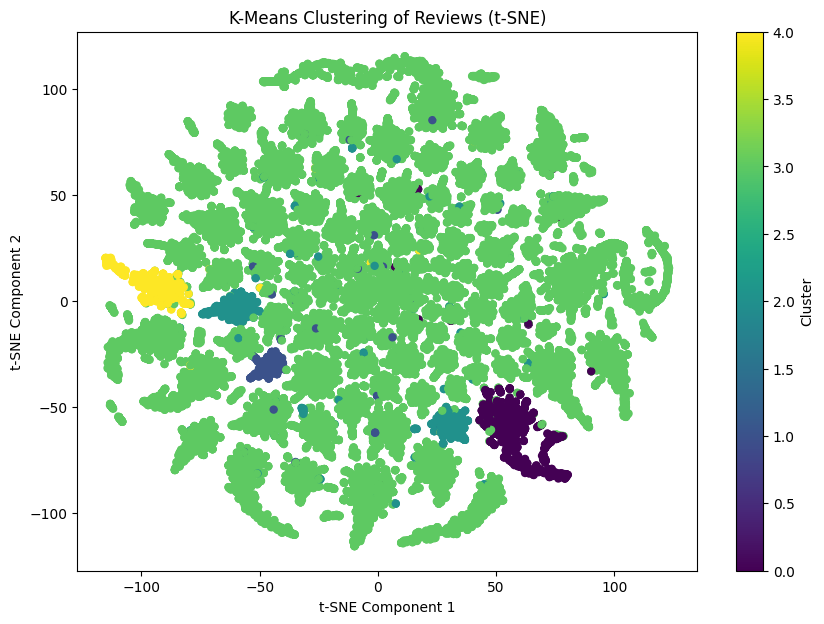

In [39]:
# Using t-SNE for dimensionality reduction (optional)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(lda_topics)

plt.figure(figsize=(10, 7))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=kmeans_labels, cmap='viridis', s=25)
plt.title("K-Means Clustering of Reviews (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster")
plt.show()

Classifying reviews as fake or real using machine learning

In [40]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

loading data and exploring data

In [41]:
df=pd.read_csv(r"TP_DS.csv")

In [42]:
df.head()

,category,rating,label,text_,cleaned_text
0,Home_and_Kitchen_5,5.0,CG,"['love', 'well', 'made', 'sturdi', 'comfort', ...",love well made sturdi comfort love pretti
1,Home_and_Kitchen_5,5.0,CG,"['love', 'great', 'upgrad', 'origin', ""'ve"", '...",love great upgrad origin 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,"['pillow', 'save', 'back', 'love', 'look', 'fe...",pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"['miss', 'inform', 'use', 'great', 'product', ...",miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,"['nice', 'set', 'good', 'qualiti', 'set', 'two...",nice set good qualiti set two month


In [43]:
# dropping text_ column as it contains raw textual data and focussing on cleaned_text
df.drop('text_',axis=1,inplace= True)

In [44]:
df.head()

,category,rating,label,cleaned_text
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month


dropping null values if any

In [45]:
df.dropna(inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      40431 non-null  object 
 1   rating        40431 non-null  float64
 2   label         40431 non-null  object 
 3   cleaned_text  40431 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


creating a length column which computes the length( no of characters)in each row

In [47]:
df['length'] = df['cleaned_text'].apply(len)

plotting the Histogram that represents distribution of length of cleaned_text_column

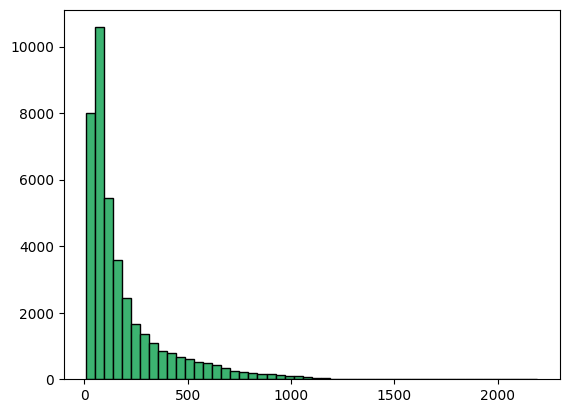

In [48]:
plt.hist(df['length'],bins=50,color='#3CB371', edgecolor='black')
plt.show()

summary statistics for numerical columns within each group (label)

In [49]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     156.697452  158.315698  9.0  51.0   89.0  195.0  1198.0  
OR     222.869311  239.511782  8.0  69.0  125.0  276.0  2190.0

Plotting Histogram that represents distribution of length of label groups(CG,OR)

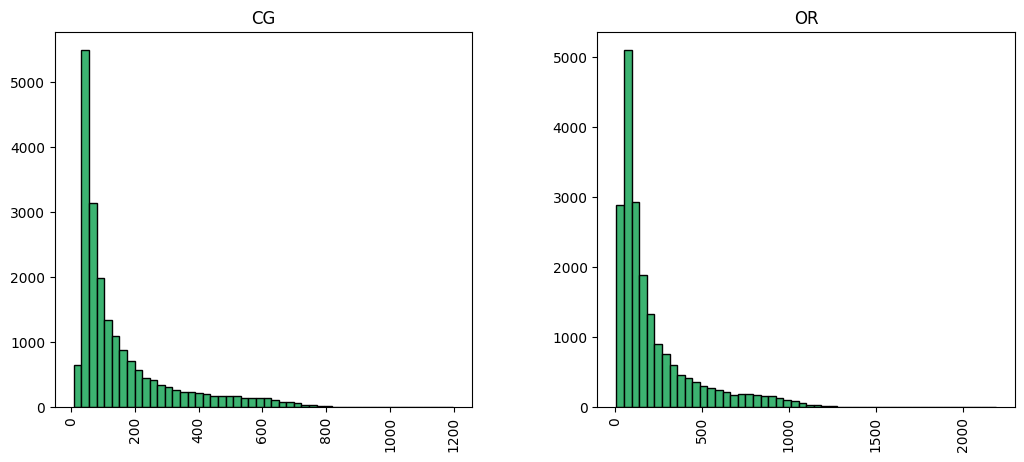

In [50]:
df.hist(column='length',by='label',bins=50,color='#3CB371',edgecolor='black',figsize=(12,5))
plt.show()

In [51]:
df.length.describe()

,length
count,40431.000000
mean,189.784200
std,205.691426
min,8.000000
25%,58.000000
50%,106.000000
75%,232.000000
max,2190.000000


In [52]:
#define a text_process function that Removes punctuation, Splits the text into words,Removes common stopwords.
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Bag of Words (BoW) Transformation

using CountVectorizer from scikit-learn to convert the preprocessed text into a Bag of Words representation, where-Each word in the corpus is treated as a feature,the frequency of each word in a document is counted

In [53]:
# Bag of Words
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x79fcec530180>)

printing the number of unique words in your vocabulary, which corresponds to the number of distinct features

In [54]:
bow_transformer.fit(df['cleaned_text'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34502


In [55]:
review1 = df['cleaned_text'][0]
review1

'love well made sturdi comfort love pretti'

Convert (review1) into a numerical Bag of Words representation, based on the vocabulary learned earlier from the entire dataset

Sparse Matrix Output

In [56]:
bow_msg1 = bow_transformer.transform([review1])
print(bow_msg1)
print(bow_msg1.shape)
print("There are 5 unique words in the 1st review and onw words has 2 count")

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 34502)>
  Coords	Values
  (0, 7332)	1
  (0, 18426)	2
  (0, 18704)	1
  (0, 23874)	1
  (0, 29268)	1
  (0, 33253)	1
(1, 34502)
There are 5 unique words in the 1st review and onw words has 2 count


In [57]:
print(bow_transformer.get_feature_names_out()[18426])
print(bow_transformer.get_feature_names_out()[23874])

love
pretti


In [60]:
bow_reviews = bow_transformer.transform(df['cleaned_text'])

In [61]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 34502)
Amount of non zero values in the bag of words model: 1001954


In [62]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


Transforms the BoW representation of the specific review (bow_msg1) into its TF-IDF representation

BoW counts the occurrences of words, while TF-IDF adjusts these counts based on how common or rare a word is across all documents

In [63]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg1)
print(bow_msg1)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 34502)>
  Coords	Values
  (0, 7332)	1
  (0, 18426)	2
  (0, 18704)	1
  (0, 23874)	1
  (0, 29268)	1
  (0, 33253)	1


In [64]:
# accessing the IDF (Inverse Document Frequency) values for specific words
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['food']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['pretti']])

5.003433005027503
4.00547486975281


IDF Values: High IDF values suggest that a word is rare across the corpus, making it more important for a specific document. Low IDF values indicate that the word is common across many documents, making it less informative for distinguishing between documents.

The IDF values help adjust the raw term frequencies (from the BoW model) to make the features more meaningful when building machine learning models.

In [65]:
# Transforming the Entire Corpus
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 34502)
No. of Dimensions: 2


classification using Machine learning models

text classification using a Multinomial Naive Bayes (MultinomialNB) model.

In [66]:
# MultinominalNB

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', MultinomialNB())                     # Train the Naive Bayes classifier
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
mn_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, mn_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, mn_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, mn_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,mn_pred)*100,2)) + '%')

Accuracy: 0.847656733028317
Classification Report:
               precision    recall  f1-score   support

          CG       0.82      0.88      0.85      4018
          OR       0.87      0.81      0.84      4069

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087

Confusion Matrix:
 [[3542  476]
 [ 756 3313]]
Model Prediction Accuracy: 84.77%


text classification using a Random Forest Classifier model.

In [68]:
# RandomForestClassifier

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and Randomforest
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', RandomForestClassifier())             # Train the RandomForest classifier
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
rf_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, rf_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,rf_pred)*100,2)) + '%')

Accuracy: 0.8488932855199703
Classification Report:
               precision    recall  f1-score   support

          CG       0.82      0.89      0.85      4018
          OR       0.88      0.80      0.84      4069

    accuracy                           0.85      8087
   macro avg       0.85      0.85      0.85      8087
weighted avg       0.85      0.85      0.85      8087

Confusion Matrix:
 [[3592  426]
 [ 796 3273]]
Model Prediction Accuracy: 84.89%


text classification using DecisionTreeClassifier model

In [70]:
# DecisionTreeClassifier

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and DecisonTree
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', DecisionTreeClassifier())            # Train the DecisionTree classifier
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
dt_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, dt_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,dt_pred)*100,2)) + '%')

Accuracy: 0.7419314949919624
Classification Report:
               precision    recall  f1-score   support

          CG       0.74      0.75      0.74      4018
          OR       0.75      0.73      0.74      4069

    accuracy                           0.74      8087
   macro avg       0.74      0.74      0.74      8087
weighted avg       0.74      0.74      0.74      8087

Confusion Matrix:
 [[3012 1006]
 [1081 2988]]
Model Prediction Accuracy: 74.19%


text classification using K-Nearest Neighbors (KNN) model

In [71]:
# KNN

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and KNN
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', KNeighborsClassifier())            # Train the Kneighboursclassifier
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
kn_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, kn_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, kn_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, kn_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,kn_pred)*100,2)) + '%')

Accuracy: 0.631012736490664
Classification Report:
               precision    recall  f1-score   support

          CG       0.58      0.94      0.72      4018
          OR       0.85      0.32      0.47      4069

    accuracy                           0.63      8087
   macro avg       0.71      0.63      0.59      8087
weighted avg       0.71      0.63      0.59      8087

Confusion Matrix:
 [[3782  236]
 [2748 1321]]
Model Prediction Accuracy: 63.1%


text classification using Support Vector Machine (SVM) model

In [72]:
# SVM

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and svm
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', KNeighborsClassifier())            # Train the Support vector machines
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
svc_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, svc_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,svc_pred)*100,2)) + '%')

Accuracy: 0.631012736490664
Classification Report:
               precision    recall  f1-score   support

          CG       0.58      0.94      0.72      4018
          OR       0.85      0.32      0.47      4069

    accuracy                           0.63      8087
   macro avg       0.71      0.63      0.59      8087
weighted avg       0.71      0.63      0.59      8087

Confusion Matrix:
 [[3782  236]
 [2748 1321]]
Model Prediction Accuracy: 63.1%


text classification using Logistic Regression model

In [73]:
# Logistic Regression

# Assuming 'cleaned_text' is your TF-IDF feature matrix and 'label' contains the target values
# Split the data into training and test sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Create the pipeline with CountVectorizer, TfidfTransformer, and LR
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),    # Convert text to Bag of Words
    ('tfidf', TfidfTransformer()),                      # Transform BOW to TF-IDF
    ('classifier', LogisticRegression())            # Train the logistic regression
])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
lr_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, lr_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')

Accuracy: 0.8653394336589588
Classification Report:
               precision    recall  f1-score   support

          CG       0.88      0.85      0.86      4018
          OR       0.85      0.88      0.87      4069

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087

Confusion Matrix:
 [[3405  613]
 [ 476 3593]]
Model Prediction Accuracy: 86.53%


print the accuracy of multiple machine learning models

In [74]:
print('Support Vector Machines:',str(np.round(accuracy_score(y_test,svc_pred)*100,2)) + '%')
print('K nearest neighbours:',str(np.round(accuracy_score(y_test,kn_pred)*100,2)) + '%')
print('Decision Tree Model:',str(np.round(accuracy_score(y_test,dt_pred)*100,2)) + '%')
print('Random Forest Model:',str(np.round(accuracy_score(y_test,rf_pred)*100,2)) + '%')
print('Multinominal Naive Bayes:',str(np.round(accuracy_score(y_test,mn_pred)*100,2)) + '%')
print('Logistic Regression:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')

Support Vector Machines: 63.1%
K nearest neighbours: 63.1%
Decision Tree Model: 74.19%
Random Forest Model: 84.89%
Multinominal Naive Bayes: 84.77%
Logistic Regression: 86.53%


Conclusion & Recommendations

Best Performer: Logistic Regression achieved the highest accuracy, followed closely by Multinomial Naive Bayes and Random Forest. These models should be considered as the primary candidates for deployment.

Underperforming Models: Support Vector Machines (SVM) and K-Nearest Neighbors (KNN) performed poorly with only 63.1% accuracy, suggesting that these models are not ideal for this dataset without further tuning or feature engineering.

Classification using deep learning

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, SimpleRNN
from tensorflow.keras.layers import GlobalAveragePooling1D, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

load data and then encode the labels into numeric values using LabelEncoder

In [5]:
data = pd.read_csv(r"TP_DS.csv")
data['label_encoded'] = LabelEncoder().fit_transform(data['label'])

split the data into training and testing sets, tokenize the text, pad the sequences, and build and train two types of neural network models: RNN and LSTM for binary classification

In [6]:
# splits the data into training and testing sets
X = data['cleaned_text']
y = data['label_encoded']
X = data['cleaned_text'].astype(str)  # Convert to string to handle any float or NaN issues
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Text Preprocessing with Tokenization and Padding
vocab_size = 10000
max_length = 100
embedding_dim = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

#model building
# Define a function to build models
def build_model(model_type="RNN"):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(SpatialDropout1D(0.2))

    if model_type == "RNN":
        model.add(SimpleRNN(64, return_sequences=False))
    elif model_type == "LSTM":
        model.add(LSTM(64, return_sequences=False))

    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])
    return model

# Training  of model
def train_and_evaluate(model_type):
    model = build_model(model_type)
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(X_train_pad, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_split=0.2,
                        callbacks=[early_stopping])

    # Evaluation of model
    y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
    print(f"Classification Report for {model_type}:")
    print(classification_report(y_test, y_pred, target_names=['CG', 'OR']))

# loop through Train and evaluate RNN, LSTM, and BiLSTM models
for model_type in ["RNN", "LSTM"]:
    train_and_evaluate(model_type)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


405/405 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.5100 - loss: 0.6946 - precision_1: 0.5137 - recall_1: 0.4417 - val_accuracy: 0.5288 - val_loss: 0.6872 - val_precision_1: 0.6667 - val_recall_1: 0.1226
Epoch 2/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step - accuracy: 0.5180 - loss: 0.6820 - precision_1: 0.5425 - recall_1: 0.3051 - val_accuracy: 0.5299 - val_loss: 0.6767 - val_precision_1: 0.7418 - val_recall_1: 0.0973
Epoch 3/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - accuracy: 0.5323 - loss: 0.6676 - precision_1: 0.5993 - recall_1: 0.2263 - val_accuracy: 0.5472 - val_loss: 0.6636 - val_precision_1: 0.9789 - val_recall_1: 0.1001
Epoch 4/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.5459 - loss: 0.6587 - precision_1: 0.8524 - recall_1: 0.1237 - val_accuracy: 0.5364 - val_loss: 0.6713 - val_precision_1: 0.8780 - val_recall_1: 0.0887
Epoch 5/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.5401 - loss: 0.6538 - precision_1: 0.7312 - recall_1: 0.1435 - 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


405/405 ━━━━━━━━━━━━━━━━━━━━ 61s 143ms/step - accuracy: 0.5721 - loss: 0.6656 - precision_2: 0.6065 - recall_2: 0.4559 - val_accuracy: 0.6840 - val_loss: 0.6174 - val_precision_2: 0.7462 - val_recall_2: 0.5614
Epoch 2/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 57s 140ms/step - accuracy: 0.6903 - loss: 0.6108 - precision_2: 0.7514 - recall_2: 0.5727 - val_accuracy: 0.7024 - val_loss: 0.5907 - val_precision_2: 0.7402 - val_recall_2: 0.6273
Epoch 3/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - accuracy: 0.6585 - loss: 0.6121 - precision_2: 0.7245 - recall_2: 0.5161 - val_accuracy: 0.6448 - val_loss: 0.6187 - val_precision_2: 0.9294 - val_recall_2: 0.3163
Epoch 4/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 57s 140ms/step - accuracy: 0.7123 - loss: 0.5256 - precision_2: 0.8197 - recall_2: 0.5509 - val_accuracy: 0.8290 - val_loss: 0.3805 - val_precision_2: 0.8657 - val_recall_2: 0.7804
Epoch 5/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 55s 137ms/step - accuracy: 0.8600 - loss: 0.3240 - precision_2: 0.9078 - recall_2: 0.80